In [1]:
pip install pandas numpy matplotlib seaborn nltk spacy scikit-learn

INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for thinc<8.4.0,>=8.3.0 from https://files.pythonhosted.org/packages/67/51/bfc2630d6bade2bc5888df63bbc88ec53bd892da11513b8603f9da201df9/thinc-8.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for blis<1.2.0,>=1.1.0 from https://files.pythonhosted.org/packages/2f/d4/e4f66161b8f1ace55b7ffe2da0a6423f860948a1a902d93545f426745fcd/blis-1.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.2/774.2 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: blis
    Found existing installation: blis 1.0.1
    Uninstalling blis-1.0.1:
      Successfully uninstalled blis-1.0.1
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.2
    Uninstalling thinc-8.3.2:
      Successfully uninstalled thinc-8.3.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# File paths
politifact_fake = 'dataset/politifact_fake.csv'
gossipcop_fake = 'dataset/gossipcop_fake.csv'
gossipcop_real = 'dataset/gossipcop_real.csv'
politifact_real = 'dataset/politifact_real.csv'

# Load datasets
df_politifact_fake = pd.read_csv(politifact_fake)
df_gossipcop_fake = pd.read_csv(gossipcop_fake)
df_gossipcop_real = pd.read_csv(gossipcop_real)
df_politifact_real = pd.read_csv(politifact_real)

# Display a sample
print("Politifact Fake:")
display(df_politifact_fake.head())


Politifact Fake:


,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [7]:
# Check for null values and basic info
for df, name in zip(
    [df_politifact_fake, df_gossipcop_fake, df_gossipcop_real, df_politifact_real],
    ["Politifact Fake", "GossipCop Fake", "GossipCop Real", "Politifact Real"]
):
    print(f"{name} Info:")
    display(df.info())
    display(df.describe())


Politifact Fake Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         432 non-null    object
 1   news_url   428 non-null    object
 2   title      432 non-null    object
 3   tweet_ids  392 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


None

,id,news_url,title,tweet_ids
count,432,428,432,392
unique,432,428,428,392
top,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,Account Suspended,937349434668498944\t937379378006282240\t937380...
freq,1,1,3,1


GossipCop Fake Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5323 non-null   object
 1   news_url   5067 non-null   object
 2   title      5323 non-null   object
 3   tweet_ids  5135 non-null   object
dtypes: object(4)
memory usage: 166.5+ KB


None

,id,news_url,title,tweet_ids
count,5323,5067,5323,5135
unique,5323,4681,4896,5047
top,gossipcop-2493749932,www.newidea.com.au/jennifer-aniston-and-brad-p...,Connecting People Through News,900336607680761857\t900407896072216576\t900412...
freq,1,8,20,6


GossipCop Real Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16817 entries, 0 to 16816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16817 non-null  object
 1   news_url   16804 non-null  object
 2   title      16817 non-null  object
 3   tweet_ids  15759 non-null  object
dtypes: object(4)
memory usage: 525.7+ KB


None

,id,news_url,title,tweet_ids
count,16817,16804,16817,15759
unique,16817,16010,15967,15758
top,gossipcop-882573,https://www.thewrap.com/this-is-us-everything-...,- USweekly,989840869443457024\t990987021194743808
freq,1,11,12,2


Politifact Real Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         624 non-null    object
 1   news_url   567 non-null    object
 2   title      624 non-null    object
 3   tweet_ids  409 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


None

,id,news_url,title,tweet_ids
count,624,567,624,409
unique,624,541,557,402
top,politifact14984,https://web.archive.org/web/20050322064340/htt...,"Outlook, Office, Skype, Bing, Breaking News, a...",3316920364\t96972843962740736\t107435614412083...
freq,1,4,13,2


In [12]:
# Add label columns
df_politifact_fake['label'] = 0  # Fake = 0
df_gossipcop_fake['label'] = 0
df_politifact_real['label'] = 1  # Real = 1
df_gossipcop_real['label'] = 1

# Combine datasets
df_combined = pd.concat([df_politifact_fake, df_gossipcop_fake, df_politifact_real, df_gossipcop_real], ignore_index=True)

# Shuffle the data
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)
print("Combined Dataset:")
display(df_combined.head())


Combined Dataset:


,id,news_url,title,tweet_ids,label
0,gossipcop-7210508029,www.elle.com/uk/life-and-culture/culture/news/...,Selena Gomez And The Weeknd Are Dating: A Time...,820070024836710400\t829761191241252865\t829782...,0
1,gossipcop-930854,https://people.com/tv/teen-mom-bombshells/,Teen Mom's Most Bombshell and Dramatic Moments,991304765010333696\t991305082875662336\t991305...,1
2,gossipcop-911475,https://www.vanityfair.com/hollywood/2018/02/s...,S.N.L.: Watch Natalie Portman Rap About Star W...,960156003277856768\t960175040087150592\t960178...,1
3,gossipcop-847921,https://www.springfieldspringfield.co.uk/view_...,The Arrangement (2017) s02e02 Episode Script,859786149417504770\t859786174889472000\t859787...,1
4,gossipcop-886689,https://en.paperblog.com/the-platinum-life-rec...,The Platinum Life Recap: The Ladies Take a Tri...,919764599016058880\t919764869817266176\t919765...,1


In [13]:
# Handle missing values
df_combined = df_combined.dropna()

print("Dataset after cleaning:")
display(df_combined.head())


Dataset after cleaning:


,id,news_url,title,tweet_ids,label
0,gossipcop-7210508029,www.elle.com/uk/life-and-culture/culture/news/...,Selena Gomez And The Weeknd Are Dating: A Time...,820070024836710400\t829761191241252865\t829782...,0
1,gossipcop-930854,https://people.com/tv/teen-mom-bombshells/,Teen Mom's Most Bombshell and Dramatic Moments,991304765010333696\t991305082875662336\t991305...,1
2,gossipcop-911475,https://www.vanityfair.com/hollywood/2018/02/s...,S.N.L.: Watch Natalie Portman Rap About Star W...,960156003277856768\t960175040087150592\t960178...,1
3,gossipcop-847921,https://www.springfieldspringfield.co.uk/view_...,The Arrangement (2017) s02e02 Episode Script,859786149417504770\t859786174889472000\t859787...,1
4,gossipcop-886689,https://en.paperblog.com/the-platinum-life-rec...,The Platinum Life Recap: The Ladies Take a Tri...,919764599016058880\t919764869817266176\t919765...,1


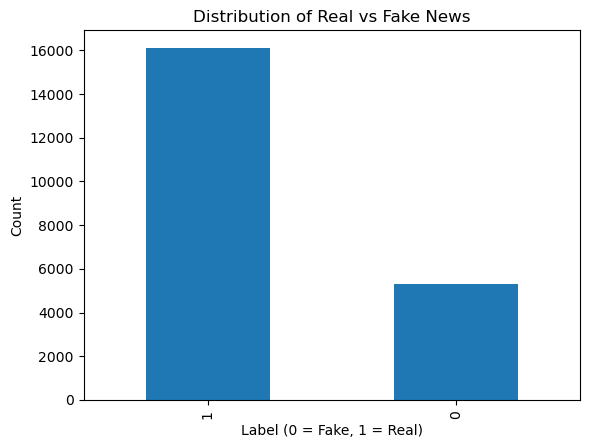

In [15]:
import matplotlib.pyplot as plt

# Label distribution
df_combined['label'].value_counts().plot(kind='bar')
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df_combined['cleaned_text'] = df_combined['title'].apply(preprocess_text)

print("Sample Cleaned Text:")
display(df_combined[['title', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saitarunaditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saitarunaditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Cleaned Text:


,title,cleaned_text
0,Selena Gomez And The Weeknd Are Dating: A Time...,selena gomez weeknd dating timeline everything
1,Teen Mom's Most Bombshell and Dramatic Moments,teen moms bombshell dramatic moments
2,S.N.L.: Watch Natalie Portman Rap About Star W...,snl watch natalie portman rap star wars preque...
3,The Arrangement (2017) s02e02 Episode Script,arrangement 2017 s02e02 episode script
4,The Platinum Life Recap: The Ladies Take a Tri...,platinum life recap ladies take trip vegas aly...
